# Dublin Bike CA 1

## 1 Data Loading Notebook


Ronan Downes | [Github](https://github.com/ronandownes/dublinbikes-CA1) | November 2022 
***


This notebook downloads the publicly available datasets of the quarterly  Dublin Bike occupancy csv files and a station GPS file  directly from the  [Smart Dublin](https://data.smartdublin.ie/dataset/dublinbikes-api) website. The hourly Phoinex Park (weather station 175) weather data provided by the Irish Meteorological Society [Met Éireann](https://www.met.ie/climate/available-data/historical-data) website is also loaded. All datasets are downloaded to a "data" folder which the code makes directly inside the folder containing this jupyter notebook.
This avoids errors in filenames and avoids any need for pathname manipulations based on operating systems.
***

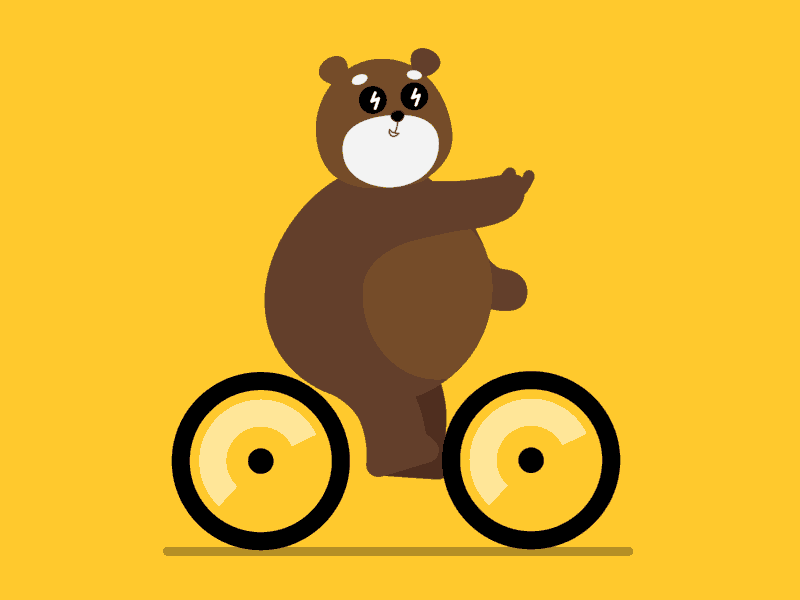

In [19]:
from IPython.display import Image
Image(filename =r'bike_sharing.gif', width = 600, height = 300)

In [1]:
#Setup required  libraries.  
import pandas as pd
import urllib
import os

In [2]:

## Downloading data directly from URL avoids cross-platform and end-user errors 
## As the dataframe generated from the Dublin Bikes occupancy data will be the principle dataframe for this project
## it is simply defined to be called "df"

if not os.path.exists("data"):
    os.makedirs("data")

df = "data/bikes.csv"


### 1.1 Load Bike Data

Retrieve Dublin Bikes data  from  [Smart Dublin](https://data.smartdublin.ie/dataset/dublinbikes-api). This study is restricted to the post COVID-19 lockdown era but a fork of the project can easily be adapted any range of available data by adding and removing comment lines in the dataframe list of tuples.

In [3]:
### Defines a list of tuples with ordered pairs of filenames and retrieval urls for urllib requests later.
### The os library checks if the quarterly csv file is already in place and if not it asks the urllib library to retrieve
### the csv at that url and name it according to item[0]
### Date range can easily be restricted by commenting out tuples.
    
dataframes = [
#      (
#         "data/2018_Q3.csv",
#         " https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/9496fac5-e4d7-4ae9-a49a-217c7c4e83d9/download/dublinbikes_20180701_20181001.csv",
#     ),
#      (
#         "data/2018_Q4.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/67ea095f-67ad-47f5-b8f7-044743043848/download/dublinbikes_20181001_20190101.csv",
#     ),
#     (
#         "data/2019_Q1.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/538165d7-535e-4e1d-909a-1c1bfae901c5/download/dublinbikes_20190101_20190401.csv",
#     ),
#     (
#         "data/2019_Q2.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/76fdda3d-d8be-441b-92dd-0ee36d9c5316/download/dublinbikes_20190401_20190701.csv",
#     ),
#     (
#         "data/2019_Q3.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/305d39ac-b6a0-4216-a535-0ae2ddf59819/download/dublinbikes_20190701_20191001.csv",
#     ),
#     (
#         "data/2019_Q4.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/5d23332e-4f49-4c41-b6a0-bffb77b33d64/download/dublinbikes_20191001_20200101.csv",
#     ),
#             (
#         "data/2020_Q1.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/aab12e7d-547f-463a-86b1-e22002884587/download/dublinbikes_20200101_20200401.csv",
#     ),
#                 (
#         "data/2020_Q2.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/8ddaeac6-4caf-4289-9835-cf588d0b69e5/download/dublinbikes_20200401_20200701.csv",
#     ),
#                     (
#         "data/2020_Q3.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/99a35442-6878-4c2d-8dff-ec43e91d21d7/download/dublinbikes_20200701_20201001.csv",
#     ),
#                         (
#         "data/2020_Q4.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/5328239f-bcc6-483d-9c17-87166efc3a1a/download/dublinbikes_20201001_20210101.csv",
#     ),
                        (
        "data/2021_Q1.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/7987ddc8-674a-4368-b344-560804771b98/download/dublinbikes_20210101_20210401.csv",
    ),
                        (
        "data/2021_Q2.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/1c18f219-3885-403e-aa55-4d4c78ee0204/download/dublinbikes_20210401_20210701.csv",
    ),
                            (
        "data/2021_Q3.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/91ccfcb7-0c5b-41e4-be1b-e5d35c609638/download/dublinbikes_20210701_20211001.csv",
    ),
                            (
        "data/2021_Q4.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/5bc73751-4280-4423-b64d-18f4cc17986d/download/dublinbikes_20211001_20220101.csv",
    ),
]

# 
for item in dataframes:
    if os.path.exists(item[0]):
        continue
    print(f"Downloading {item[0]} from {item[1]}")
    urllib.request.urlretrieve(item[1], item[0])
    
df = "data/bikes.csv"
df = pd.concat([pd.read_csv(item[0]) for item in dataframes])   

if not os.path.exists("data/bikes.csv"):
    df.to_csv("data/bikes.csv", index=False)

In [4]:
df.tail()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
2776080,507,2022-01-01 23:35:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
2776081,507,2022-01-01 23:40:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
2776082,507,2022-01-01 23:45:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
2776083,507,2022-01-01 23:50:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
2776084,507,2022-01-01 23:55:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615


### 1.2 Load Weather Data 

Retrieve historical weather data for Phoinex Park Weather Station (175) on an hourly basis. Filtering to this choice on [Met Éireann's](https://www.met.ie/climate/available-data/historical-data) Irish Meteorological Society website is easy and gives the URL link used below. Note: hly is code for hourly and the hly175.csv file starts with 15 rows layiing out a key for the meaning of the abbreviated headers.

In [5]:
       
weather_df = "data/hly175.csv"    
        
def retrieve_weather():
    weather_url = "http://cli.fusio.net/cli/climate_data/webdata/hly175.csv"
    urllib.request.urlretrieve(weather_url, weather_df)
    #Conditionally calls  retrieval functions if CSVs are not in place in the"data" directory
    
if not os.path.exists(weather_df):
    retrieve_weather()
    
weather_df = pd.read_csv("data/hly175.csv", skiprows=15)   
if not os.path.exists("data/weather.csv"):
    weather_df.to_csv("data/weather.csv", index=False)
    

C:\Users\ronan\AppData\Local\Temp\ipykernel_13544\165871317.py:11: DtypeWarning: Columns (2,4,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv("data/hly175.csv", skiprows=15)


In [6]:
weather_df.shape


(168408, 11)

### 1.3 Load Station GPS

Retrieves the Dublin Bikes Station GPS data from   [Smart Dublin](https://data.smartdublin.ie/dataset/dublinbikes-api) website.

In [7]:
# gps_df ="data/gps.csv"
        
# def retrieve_gps():
#     gps_url = "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/2dec86ed-76ed-47a3-ae28-646db5c5b965/download/dublin.csv"
#     urllib.request.urlretrieve(gps_url, gps_df) 
    
    
# if not os.path.exists(gps_df):
#     retrieve_gps()                  #Conditionally retrievs gps CSVs if not in "data" directory
    
# gps_df = pd.read_csv("data/gps.csv")   
# if not os.path.exists("data/gps.csv"):
#     gps_df.to_csv("data/gps.csv", index=False)
    
# gps_df.sample(11)

### 1.4 Close dataframes 

In [8]:
# close down dataframes saving  memory

df = None
weather_df = None
# gps_df= None